In [1]:
import pandas as pd
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
################### reading files ####################
my_example_nc_file = 'EUREC4A_HALO_BAHAMAS-Radiometer_20200205a.nc'
fh = Dataset(my_example_nc_file, mode='r')
df_fdir = pd.read_csv('BBR_DirectFraction_Flight_20200205a_R0.dat',skiprows = 34,delim_whitespace=True)
df_fdw = pd.read_csv('BBR_Fdn_clear_sky_Flight_20200205a_R0.dat',skiprows = 34, delim_whitespace=True)
#nav = pd.read_csv('Nav_IMS0000_02022020.Asc',skiprows=14, header=None,delim_whitespace=True)
fdw_time = df_fdw.loc[:,['sod','F_dw']]
fdir_time = df_fdir.loc[:,'f_dir']
db = pd.concat([fdw_time,fdir_time],axis=1)
db.set_index('sod',inplace=True)
time = fh.variables['TIME'][:] # time
time_bac = pd.DataFrame(time.T, columns = ['time'])
time_bac = time_bac/1000
time_bac

,time
0,33352.0
1,33352.1
2,33352.2
3,33352.3
4,33352.4
...,...
327315,66083.5
327316,66083.6
327317,66083.7
327318,66083.8


In [2]:
array = np.arange(38633,66376, 1)
arr = array.repeat(10)
df_arr = pd.DataFrame(arr, columns = ['time_arr'])
df_arr.set_index('time_arr',inplace=True)
data = df_arr.join(db)
data_int= data.interpolate(method='linear', limit_direction='forward', axis=0)
#data_int.drop(data_int.index[0:12089],inplace=True)
data_int.reset_index(inplace=True)
data_int['time']=data_int.loc[:,'index']
#data_int[data_int.time==66083]
df_r = data_int.iloc[0:274510,:]
df_r

,index,F_dw,f_dir,time
0,38633,92.753571,0.857420,38633
1,38633,92.753571,0.857420,38633
2,38633,92.753571,0.857420,38633
3,38633,92.753571,0.857420,38633
4,38633,92.753571,0.857420,38633
...,...,...,...,...
274505,66083,744.293450,0.848352,66083
274506,66083,744.281980,0.848345,66083
274507,66083,744.270510,0.848337,66083
274508,66083,744.259040,0.848330,66083


In [3]:
# 327320 - 274510
x = df_r.iloc[0:1,:]
df_exp = pd.concat([x]*52810, ignore_index=True)
df1 = pd.concat([df_exp,df_r],axis=0)
df1.reset_index(inplace=True,drop=True)
df1.drop('index',axis=1)

,F_dw,f_dir,time
0,92.753571,0.857420,38633
1,92.753571,0.857420,38633
2,92.753571,0.857420,38633
3,92.753571,0.857420,38633
4,92.753571,0.857420,38633
...,...,...,...
327315,744.293450,0.848352,66083
327316,744.281980,0.848345,66083
327317,744.270510,0.848337,66083
327318,744.259040,0.848330,66083


In [4]:
fdw = df1.loc[:,'F_dw']
fdir = df1.loc[:,'f_dir']
szai = fh.variables['SUN_ALT'][:] # solar altitude angle
sza = pd.DataFrame(szai.T)
sza.columns=['SUN_ALT']
saai = fh.variables['SUN_AZI'][:] # solar azimuth angle
saa = pd.DataFrame(saai.T)
saa.columns=['SUN_AZI']
SWd = fh.variables['FDSC'][:]
SWD = pd.DataFrame(SWd.T)
SWD.columns=['shortwave_down']
SWu = fh.variables['FUS'][:]
LWu = fh.variables['FDL'][:]
LWd = fh.variables['FUL'][:]
SWU = pd.DataFrame(SWu.T)
SWU.columns=['ShortWave_up']
LWU = pd.DataFrame(LWu.T)
LWU.columns=['LongWave_down']
LWD = pd.DataFrame(LWd.T)
LWD.columns=['LongWave_up']
radiometer_nc= pd.concat([time_bac,SWD,SWU,LWU,LWD,saa,sza,fdw,fdir],axis=1)
d = radiometer_nc.loc[:,'time'].astype(str).str.split('.')
dec = []
for b,n in d:
    dec.append(b)
decend = pd.DataFrame(dec)
decend.columns=['Time']
df2=pd.concat([decend,radiometer_nc],axis=1)
df2.drop(['time'],axis=1,inplace=True)
df2

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir
0,33352,-1.931374,-1.811160,363.288940,456.666840,102.655632,-17.329508,92.753571,0.857420
1,33352,-2.003815,-0.997929,365.988037,456.965942,102.655701,-17.329048,92.753571,0.857420
2,33352,-1.717217,-1.109987,370.876862,456.814880,102.655777,-17.328588,92.753571,0.857420
3,33352,-1.911554,-0.505591,372.329742,455.910217,102.655846,-17.328129,92.753571,0.857420
4,33352,-2.157300,-0.236187,379.205719,456.259521,102.655922,-17.327669,92.753571,0.857420
...,...,...,...,...,...,...,...,...,...
327315,66083,440.195526,36.919842,424.064789,559.076111,-131.436310,47.462360,744.293450,0.848352
327316,66083,440.897766,35.048714,419.479523,560.403748,-131.435883,47.462009,744.281980,0.848345
327317,66083,442.233398,33.131096,418.558289,560.581970,-131.435471,47.461658,744.270510,0.848337
327318,66083,447.098572,32.049683,421.691528,561.540649,-131.435043,47.461311,744.259040,0.848330


In [5]:
ri = fh.variables['IRS_PHI'][:] # roll angle "deg"
ro = pd.DataFrame(ri.T,columns=['roll'])
pi = fh.variables['IRS_THE'][:] # pitch angle "deg"
po = pd.DataFrame(pi.T,columns=['pitch'])
yi = fh.variables['IRS_HDG'][:] # yaw angle "deg"
y = pd.DataFrame(yi.T,columns=['yaw'])
df_big = pd.concat([df2,ro,po,y],axis=1)
df_big

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir,roll,pitch,yaw
0,33352,-1.931374,-1.811160,363.288940,456.666840,102.655632,-17.329508,92.753571,0.857420,0.900415,1.522806,74.986923
1,33352,-2.003815,-0.997929,365.988037,456.965942,102.655701,-17.329048,92.753571,0.857420,0.872030,1.943078,75.011368
2,33352,-1.717217,-1.109987,370.876862,456.814880,102.655777,-17.328588,92.753571,0.857420,0.826967,2.401850,75.037132
3,33352,-1.911554,-0.505591,372.329742,455.910217,102.655846,-17.328129,92.753571,0.857420,0.787227,2.890462,75.061905
4,33352,-2.157300,-0.236187,379.205719,456.259521,102.655922,-17.327669,92.753571,0.857420,0.772706,3.401760,75.076164
...,...,...,...,...,...,...,...,...,...,...,...,...
327315,66083,440.195526,36.919842,424.064789,559.076111,-131.436310,47.462360,744.293450,0.848352,0.095063,0.745149,75.860016
327316,66083,440.897766,35.048714,419.479523,560.403748,-131.435883,47.462009,744.281980,0.848345,0.468958,0.563807,75.818245
327317,66083,442.233398,33.131096,418.558289,560.581970,-131.435471,47.461658,744.270510,0.848337,0.747821,0.411765,75.791130
327318,66083,447.098572,32.049683,421.691528,561.540649,-131.435043,47.461311,744.259040,0.848330,0.931737,0.274180,75.758987


In [6]:
import math
r_off =  0.3
p_off =  -2.33
i1=[]
i2=[]
j1=[]
j2=[]
k1=[]
k2=[]
l1=[]
l2=[]

for i in df_big.SUN_ALT:
    i1.append(math.sin((90-i)*(math.pi/180)))
    i2.append(math.cos((90-i)*(math.pi/180)))
for k in df_big.roll:
    k=k+r_off
    k1.append(math.sin(k*(math.pi/180)))
    k2.append(math.cos(k*(math.pi/180)))
diff = df_big.SUN_AZI-df_big.yaw
for j in diff:
    j1.append(math.sin(j*(math.pi/180)))
    j2.append(math.cos(j*(math.pi/180)))
for l in df_big.pitch:
    l=l+p_off
    l1.append(math.sin(l*(math.pi/180)))
    l2.append(math.cos(l*(math.pi/180)))
       
eq1 = i1
eq2 = [i2[i]*k1[i]*j1[i] for i in range(len(i2))]
eq3 = [i2[i]*l1[i] for i in range(len(i2))]
eq4 = [k2[i]*j2[i] for i in range(len(k2))]
eq5 = [i1[i]*l2[i]*k2[i] for i in range(len(i1))]
factor = [eq1[i]/(eq2[i]+(eq3[i]*eq4[i])+eq5[i]) for i in range(len(eq1))]
x = df_big.F_dw
y = df_big.f_dir
Fdw = [y[i]*x[i]*factor[i]+(1-y[i])*x[i] for i in range(len(i1))]

swd_correct = pd.DataFrame(Fdw)
swd_correct.columns = ['shortwave_down_corrected']
df_big['shortwave_down_corrected']=swd_correct
df_bigg = df_big.groupby('Time').mean()
df_bigg.reset_index(inplace=True)
df_bigg.to_csv('df_bigg_5feb.csv')

In [7]:
def convertSeconds(seconds):
    h = seconds//(60*60)
    m = (seconds-h*60*60)//60
    s = seconds-(h*60*60)-(m*60)
    return [h, m, s]
convertSeconds(66083)

[18, 21, 23]

In [8]:
import datetime
start = datetime.datetime(2020, 2, 5, 9, 15, 52)
end = datetime.datetime(2020, 2, 5, 18, 21, 23)
delta = end - start
time_delta = []
for i in range(delta.seconds + 1):
    time_delta.append(start + datetime.timedelta(seconds=i))
df_time_delta = pd.DataFrame(time_delta)
df_bigg['time']=df_time_delta
df_bigg

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir,roll,pitch,yaw,shortwave_down_corrected,time
0,33352,-2.082051,-0.606356,375.477356,456.203796,102.655952,-17.327440,92.753571,0.857420,0.836947,3.694600,75.077316,93.581594,2020-02-05 09:15:52
1,33353,-2.205542,-0.029773,373.250671,455.872406,102.656677,-17.322840,92.753571,0.857420,1.351849,7.064689,75.153961,95.283339,2020-02-05 09:15:53
2,33354,-1.777667,-0.423806,374.653107,455.107605,102.657394,-17.318226,92.753571,0.857420,1.035944,6.593740,75.237885,94.960644,2020-02-05 09:15:54
3,33355,-1.745504,-0.543929,374.881989,453.885590,102.658127,-17.313601,92.753571,0.857420,-0.589407,6.857656,75.103500,94.729403,2020-02-05 09:15:55
4,33356,-1.970965,-0.253893,379.942657,452.386292,102.658852,-17.308968,92.753571,0.857420,-1.399117,7.791720,74.888878,95.061679,2020-02-05 09:15:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32727,66079,479.743652,39.428711,424.590393,552.565857,-131.453552,47.476555,744.757983,0.848651,1.198251,1.021109,75.549049,723.698167,2020-02-05 18:21:19
32728,66080,507.575104,34.391850,424.338593,554.605652,-131.449295,47.473042,744.643283,0.848577,0.810428,0.990268,75.805573,725.160258,2020-02-05 18:21:20
32729,66081,526.063354,38.170551,416.766815,557.427917,-131.445038,47.469536,744.528584,0.848503,1.617988,2.047935,75.858963,731.614067,2020-02-05 18:21:21
32730,66082,471.229279,33.541256,422.685364,559.338928,-131.440781,47.466030,744.413885,0.848430,0.830801,1.683779,75.923866,731.811808,2020-02-05 18:21:22


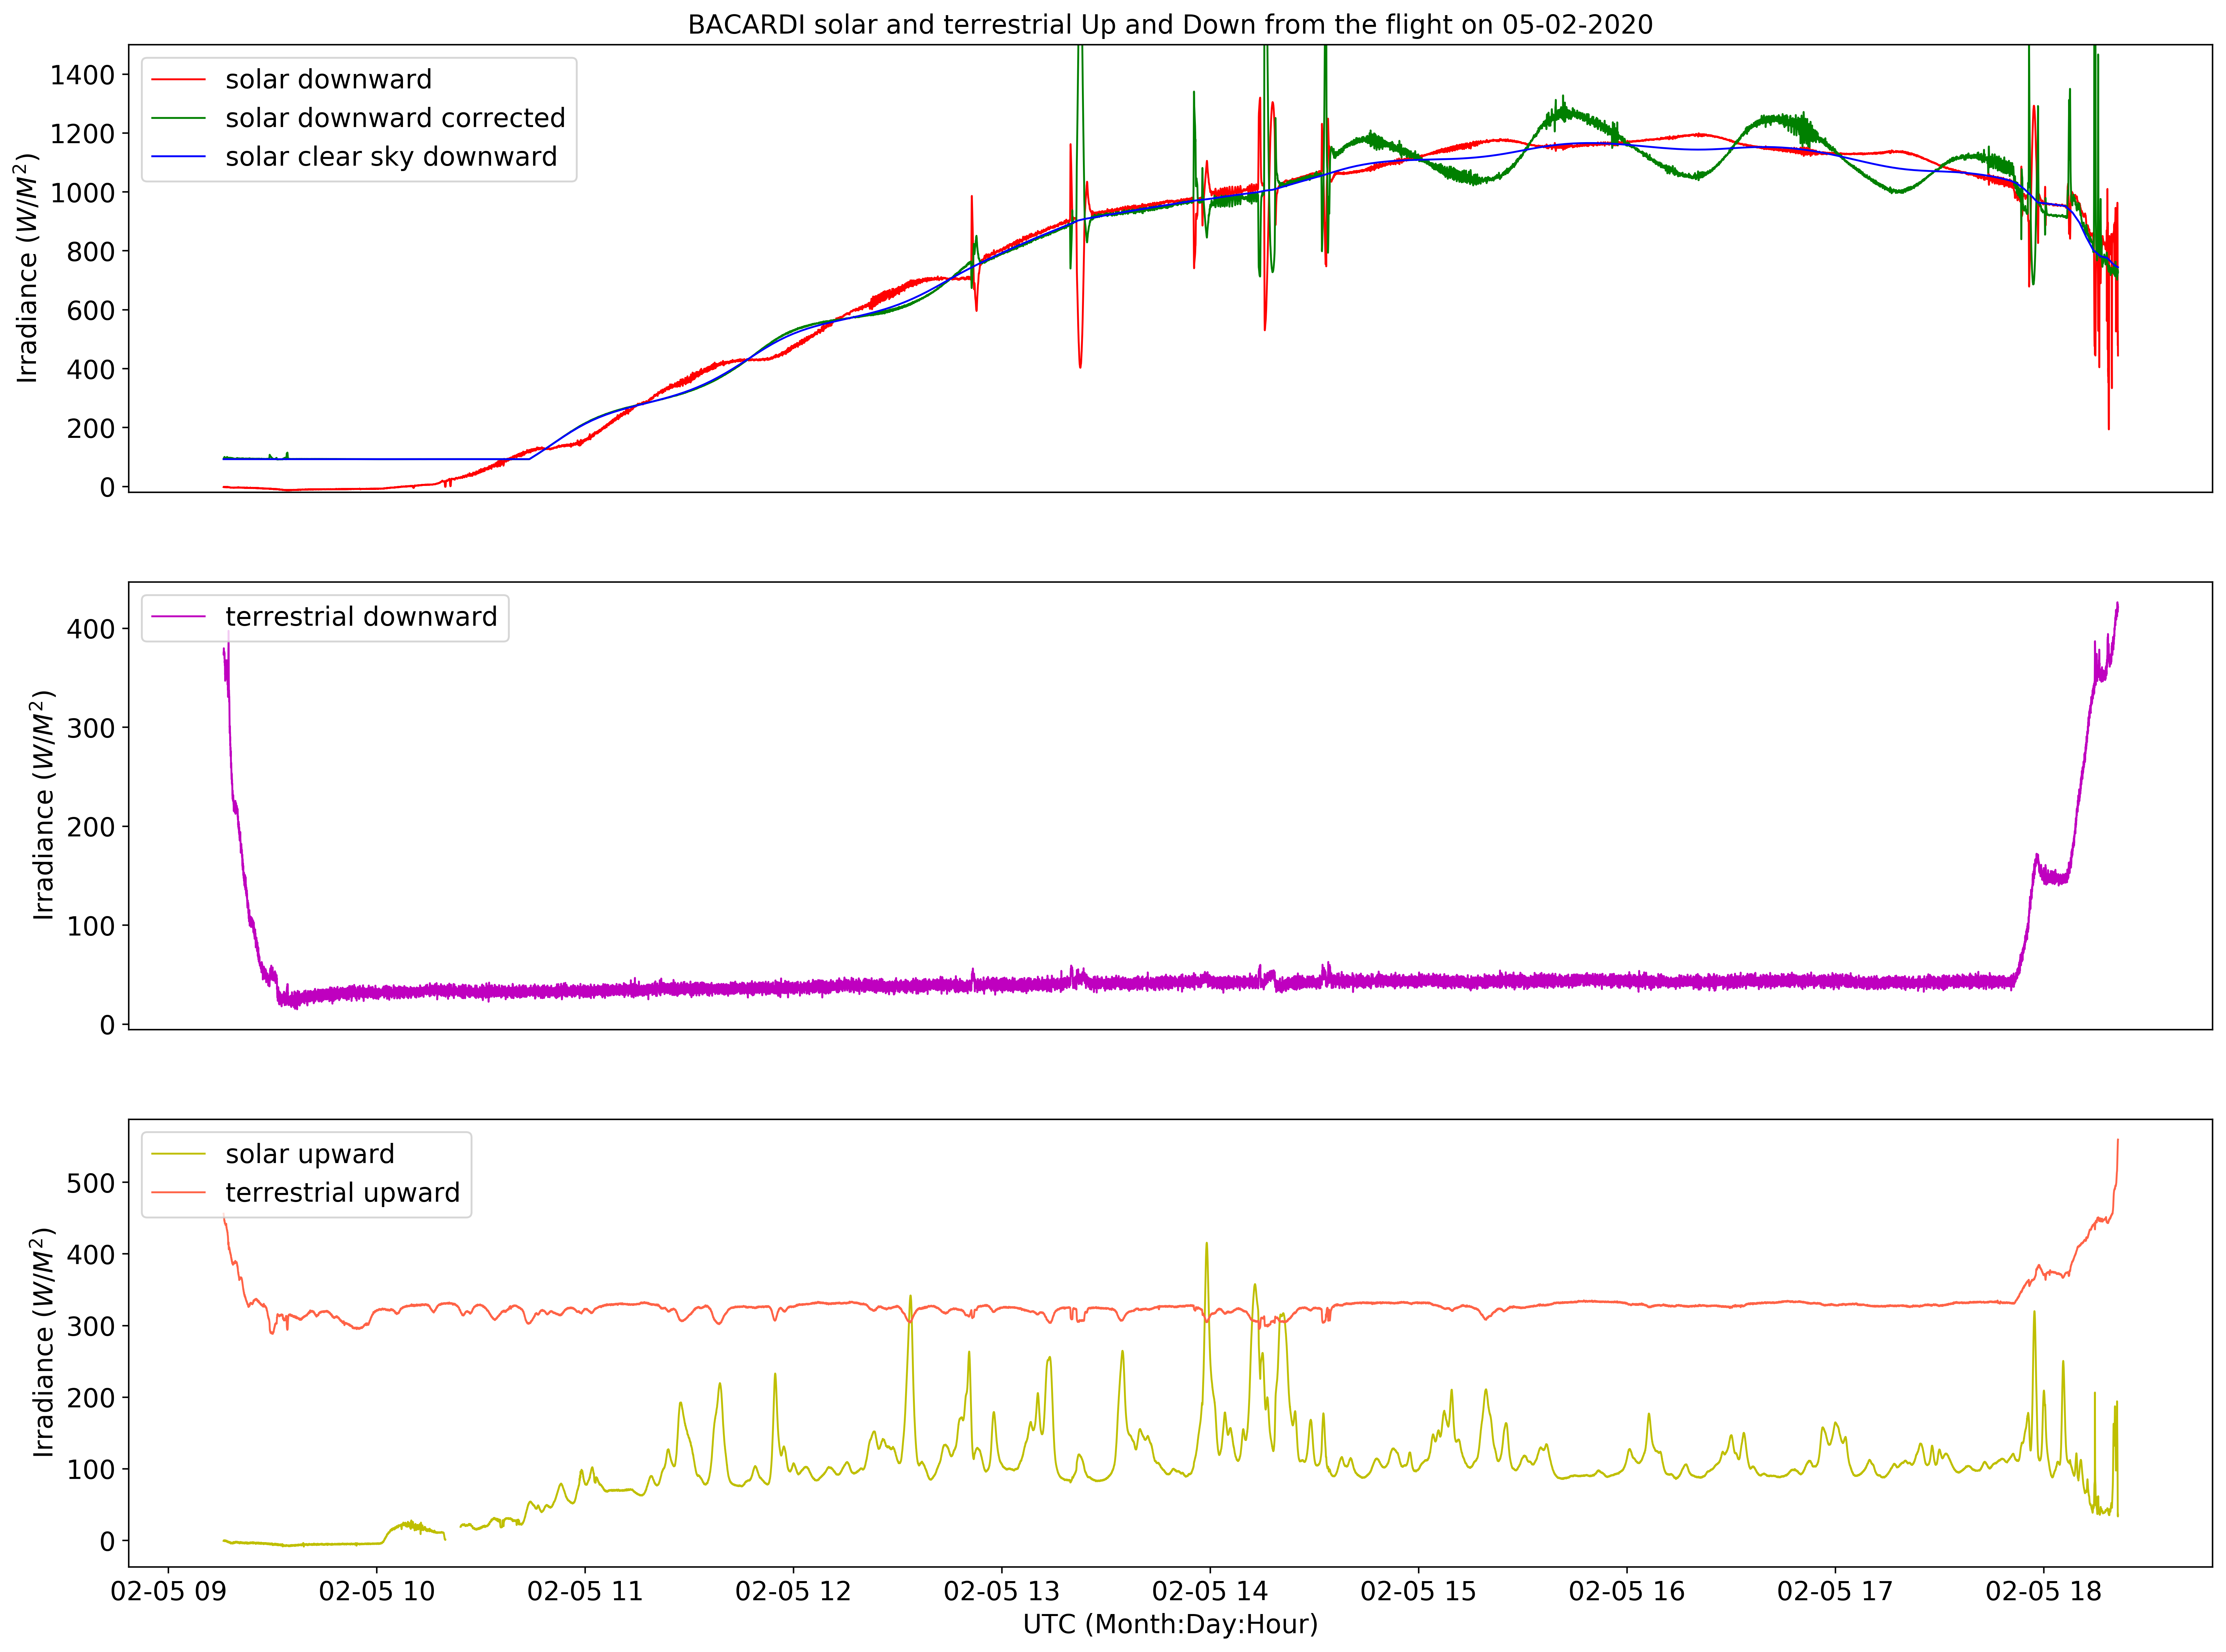

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
#df_new_24jan = pd.read_csv('df_new_24jan.csv')
plt.figure(figsize=(20,15),dpi=400)
plt.subplot(311)
plt.plot(df_bigg.time,df_bigg.shortwave_down, 'r', label = 'solar downward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.shortwave_down_corrected, 'g', label = 'solar downward corrected',linewidth=1)
plt.plot(df_bigg.time,df_bigg.F_dw, 'b', label = 'solar clear sky downward',linewidth=1)
plt.title('BACARDI solar and terrestrial Up and Down from the flight on 05-02-2020',fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.ylim(-20,1500)
plt.subplot(312)
plt.plot(df_bigg.time,df_bigg.LongWave_down, 'm', label = 'terrestrial downward',linewidth=1)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.subplot(313)
plt.plot(df_bigg.time,df_bigg.ShortWave_up, 'y', label = 'solar upward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.LongWave_up, 'tomato', label = 'terrestrial upward',linewidth=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xlabel('UTC (Month:Day:Hour)',fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.show()